<a href="https://colab.research.google.com/github/rtajeong/M2_2025/blob/main/gg_32_linear_binary_classification_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classification

## Binary Classification

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [2]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
X, y = iris.data, iris.target
print(X.shape, type(X))# (150, 4) <class 'numpy.ndarray'>
print(y.shape, type(y))# (150,) <class 'numpy.ndarray'>

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


In [4]:
X2 = X[:, :2]   # first two features

Text(0, 0.5, 'Sepal width')

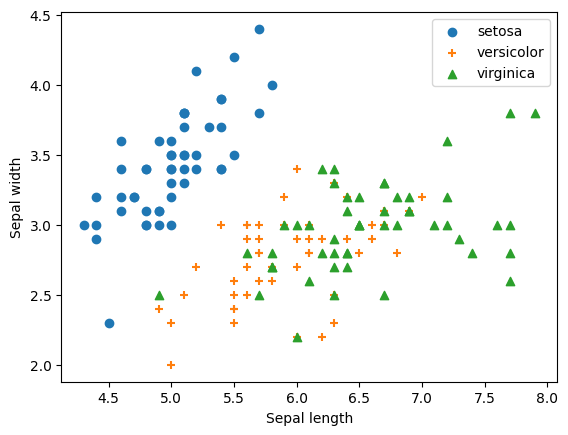

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [6]:
y2 = y.copy()      # y의 복사본을 만든다
y2[(y2==2)] = 1    # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

Text(0, 0.5, 'Sepal width')

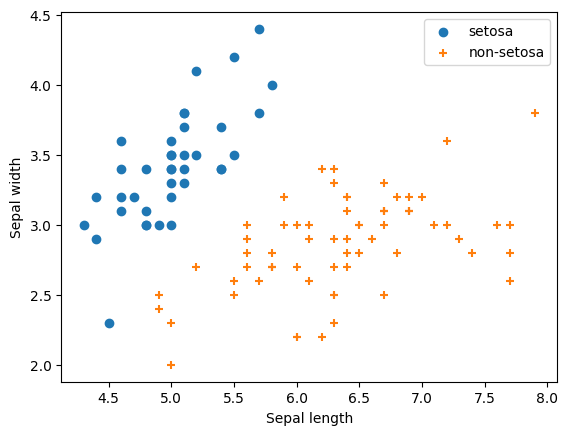

In [8]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [9]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=2000, random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(max_iter=2000, random_state=42)

In [10]:
clf.coef_, clf.intercept_

(array([[  98.14963797, -139.44757308]]), array([-90.4188475]))

In [11]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
print(a, b, c)

98.1496379726464 -139.44757307589103 [-90.4188475]


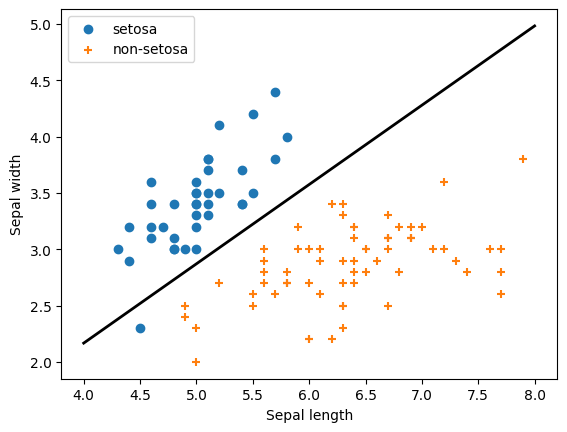

In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(2):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [13]:
print(clf.predict([[4.5, 3.5]]))  # 0

[0]


In [14]:
print(clf.score(X2, y2))

0.9933333333333333


In [15]:
print(clf.score(X_test, y_test))

1.0


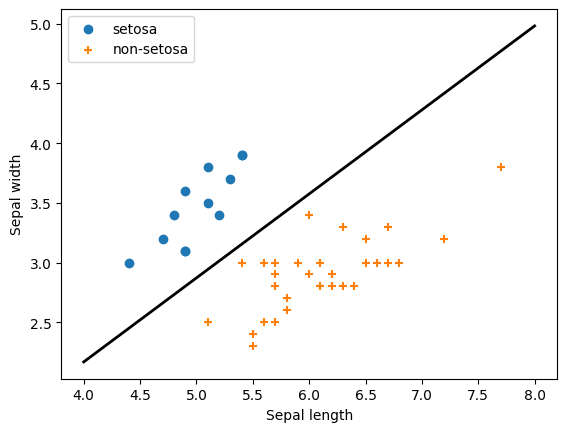

In [16]:
for i in range(2):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

## K-Fold cross validation

In [17]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import SGDClassifier

# cv = KFold(n_splits=5, shuffle=True, random_state=17)   # without considering the class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
# X2.shape, y2.shape

# for train_index, test_index in cv.split(X2):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X2[train_index], X2[test_index]
#    y_train, y_test = y2[train_index], y2[test_index]
#    clf = SGDClassifier()
#    clf.fit(X_train, y_train)
#    clf.score(X_test, y_test)

# 위의 과정을 한 번에 해 주는 함수가 있음.
score2 = cross_val_score(SGDClassifier(), X2, y2, cv=5)   # for clssifications, both work
score1 = cross_val_score(SGDClassifier(), X2, y2, cv=cv)  # more control with KFold()
print(score1)
print(score2)

[1.  1.  0.9 0.9 1. ]
[1.         0.86666667 0.93333333 1.         0.96666667]


## Comparing different classifiers

Text(0, 0.5, 'petal length')

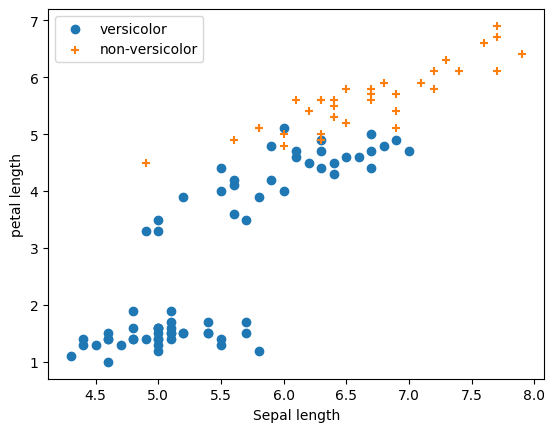

In [18]:
iris = load_iris()
X, y = iris.data, iris.target
X3 = X[:,[0,2]]
y3 = y.copy()
y3[y3 == 1] = 0
y3[y3 == 2] = 1
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=17)

markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['versicolor', 'non-versicolor']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("petal length")

In [19]:
clf1 = SGDClassifier(penalty='l2', alpha=0.0001, random_state=42)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.9111111111111111

In [20]:
clf2 = SGDClassifier(penalty='l2', alpha=1, random_state=42)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.6888888888888889

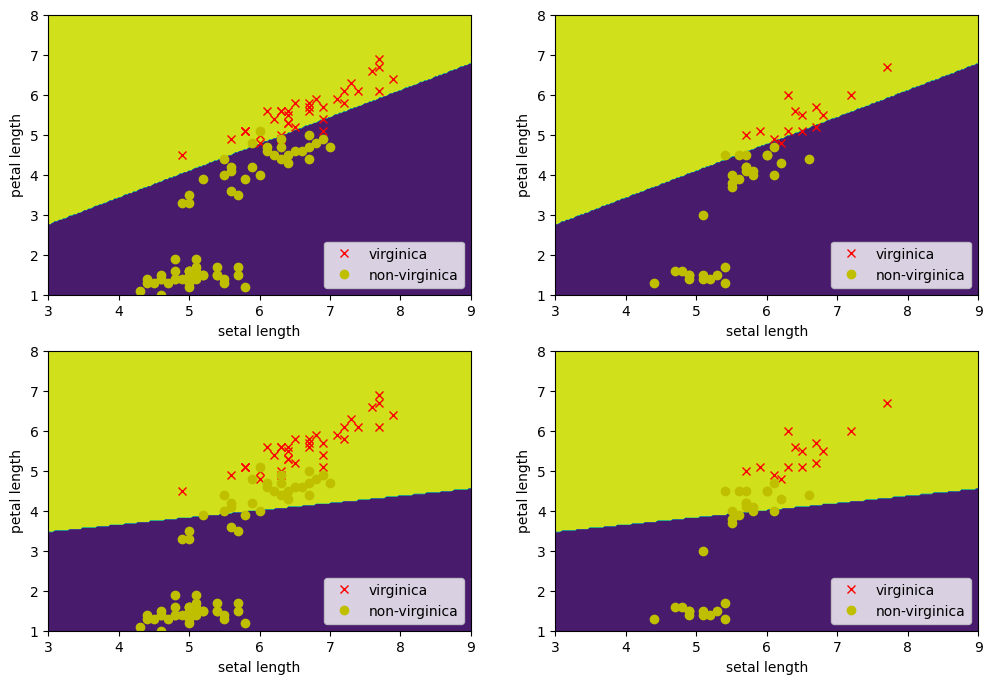

In [21]:
x0, x1 = np.meshgrid(
        np.linspace(3, 9, 200).reshape(-1, 1),
        np.linspace(1, 8, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict1 = clf1.predict(X_new)
y_predict2 = clf2.predict(X_new)

zz1 = y_predict1.reshape(x0.shape)
zz2 = y_predict2.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)

# train data for clf1
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "rx", label="virginica")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz1)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")

# test data for clf1
plt.subplot(2,2,2)
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "rx", label="virginica")
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz1)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")

# train data fro clf2
plt.subplot(2,2,3)
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "rx", label="virginica")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz2)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")

# test data for clf2
plt.subplot(2,2,4)
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "rx", label="virginica")
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "yo", label="non-virginica")
plt.contourf(x0, x1, zz2)
plt.xlabel("setal length")
plt.ylabel("petal length")
plt.legend(loc="lower right")
plt.show()

In [22]:
clf1.coef_, clf1.intercept_, clf2.coef_, clf2.intercept_

(array([[-151.63660655,  225.78490314]]),
 array([-170.7522366]),
 array([[-0.07619048,  0.42329004]]),
 array([-1.24588337]))

# Exercise

In [23]:
# KFold()
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

X = np.array([[1, 2],
              [3, 4],
              [1, 2],
              [3, 4],
              [3, 0],
              [5, 9]])
y = np.array([1, 2, 3, 4, 1, 2, 3])

kf = KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [1 2 4 5] TEST: [0 3]
TRAIN: [0 1 3 4] TEST: [2 5]
TRAIN: [0 2 3 5] TEST: [1 4]
